# mesoSPIM PSF-analysis

Currently, this analysis notebook needs a stack with beads converted to `.tif`-files. pixel-size and zoom have to be set manually.

### Setup environment

In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread, find_available_plugins
import time

In [2]:
from psf import compute, plotPSF

### Setup plotting

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

In [4]:
from ipywidgets import interact
from ipywidgets import IntSlider

### Define parameters

`windowUm = [12, 10, 10]` defines a "window" volume in microns in which only a single bead can exist (for the bead to be included in the analysis, the volume has to contain a single bright maximum).

In [125]:
# Full FOV at zoom 1x
FOVpxLat = 2048.0 # 2048
UmPerPxLat = 6.55
pxPerUmLat = 1/UmPerPxLat
FOVumLat = FOVpxLat / pxPerUmLat
pxPerUmAx = 1.0 # 1.0
windowUm = [40, 20, 20] # 30,20,20 for most 1x overviews
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'windowUm':windowUm}
options['thresh'] = .05

In [144]:
# Full FOV at zoom 4x
FOVpxLat = 2048.0 # 2048
UmPerPxLat = 1.6
pxPerUmLat = 1/UmPerPxLat
FOVumLat = FOVpxLat / pxPerUmLat
pxPerUmAx = 1.0 # 1.0
windowUm = [12, 10, 10]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'windowUm':windowUm}
options['thresh'] = .05

In [ ]:
# 1/4 FOV at zoom 4x
FOVpxLat = 512.0 # 2048
UmPerPxLat = 1.6
pxPerUmLat = 1/UmPerPxLat
FOVumLat = FOVpxLat / pxPerUmLat
pxPerUmAx = 1.0 # 1.0
windowUm = [20, 5, 5]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'windowUm':windowUm}
options['thresh'] = .05

In [126]:
options

{'FOVpxLat': 2048.0,
 'FOVumLat': 13414.4,
 'pxPerUmAx': 1.0,
 'pxPerUmLat': 0.15267175572519084,
 'thresh': 0.05,
 'windowUm': [40, 20, 20]}

### Load data

In [ ]:
im = imread('./data/images.tif', plugin='tifffile') # old testdata

In [ ]:
im = imread('./data/test2-withETL.tif', plugin='tifffile') # 512 px testdata

In [ ]:
im = imread('./data/test2-withETL.tif') # 512 px testdata

In [ ]:
im = imread('./data/5ms_2nd_488_nm_508_520-35_4x_Right_000000-3-200slices.tif', plugin='tifffile')  # 2048 px testdata

In [7]:
# 99Hz 10ms 1x with ETL
im = imread('./data/10E5_withETL_10ms_99Hz_488_nm_508_520-35_0_8x_Right_000002-1.tif') 

In [37]:
# 99Hz 10ms 1x without ETL
im = imread('./data/10E5_withoutETL_10ms_99Hz_488_nm_508_520-35_0_8x_Right_000002-1.tif') 

In [51]:
# 99Hz 20ms 1x with ETL
im = imread('./data/10E5_withETL_20ms_99Hz_488_nm_508_520-35_0_8x_Right_000002-1.tif') 

In [64]:
# 99Hz 40ms 1x with ETL
im = imread('./data/10E5_withETL_40ms_99Hz_488_nm_508_520-35_0_8x_Right_000002.tif') 

### 199 Hz / 5ms / 1x

In [127]:
# 199 Hz 5ms 1x without ETL --> switch to windowUm = [40, 20, 20]
im = imread('./data/10E5_withoutETL_5ms_199Hz_488_nm_508_520-35_0_8x_Right_000000.tif')

In [77]:
# 199 Hz 5ms 1x with ETL --> windowUm = [30, 20, 20]
im = imread('./data/10E5_withETL_5ms_199Hz_488_nm_508_520-35_0_8x_Right_000000.tif')

In [107]:
# 199 Hz 5 ms 1x with ETL, 3.5V --> windowUm = [30, 20, 20]
im = imread('./data/10E5_withETL_5ms_199Hz_3_5V_488_nm_508_520-35_0_8x_Right_000002.tif')

### 199 Hz / 5 ms / 4x

In [143]:
# 199 Hz 5ms 4x with ETL --> windowUm = [12, 10, 10]
im = imread('./data/5ms_2nd_488_nm_508_520-35_4x_Right_000000.tif')

In [172]:
# 199 Hz 20ms 4x with ETL --> windowUm = [12, 10, 10]
im = imread('./data/20ms_488_nm_405-488-561-640-Quadrupleblock_4x_Right_000000.tif')

In [159]:
# 199 Hz 5 ms 4x without ETL --> windowUm = [12, 10, 10]
im = imread('./data/5ms_2nd_noETL_488_nm_508_520-35_4x_Right_000000.tif')

In [ ]:
im.shape

### Computation

In [173]:
start_time = time.time()
data, beads, maxima, centers, smoothed = compute(im, options)
stop_time = time.time()
print('Runtime: ',stop_time-start_time, ' s')

Runtime:  238.30221843719482  s


In [174]:
centers = pd.DataFrame(centers, columns=['Z','Y','X'])

In [175]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]
PSF = PSF.join(centers)

### Inspect results

In [176]:
PSF.head()

,FWHMlat,FWHMax,Max,Z,Y,X
0,3.728245,13.251955,6563,188,1918,1175
1,3.701634,10.077342,8295,188,1767,1999
2,3.091916,12.535794,8772,188,1544,1703
3,2.544899,11.565460,13042,188,900,1851
4,2.598167,9.121884,13176,188,795,1960


In [177]:
print('# Beads: ', len(PSF))
print('Mean lateral FWHM: ', round(PSF['FWHMlat'].mean(),3), ' +/- ', round(PSF['FWHMlat'].sem(),3), ' μm')
#print('STD lateral FWHM: ', round(PSF['FWHMlat'].std(),3))
print('Mean axial FWHM: ', round(PSF['FWHMax'].mean(),3), ' +/- ', round(PSF['FWHMax'].sem(),3), ' μm')
#print('STD axial FWHM: ', round(PSF['FWHMax'].std(),3))

# Beads:  2194
Mean lateral FWHM:  3.091  +/-  0.013  μm
Mean axial FWHM:  11.386  +/-  0.05  μm


### Plot axial FWHM vs. FOV

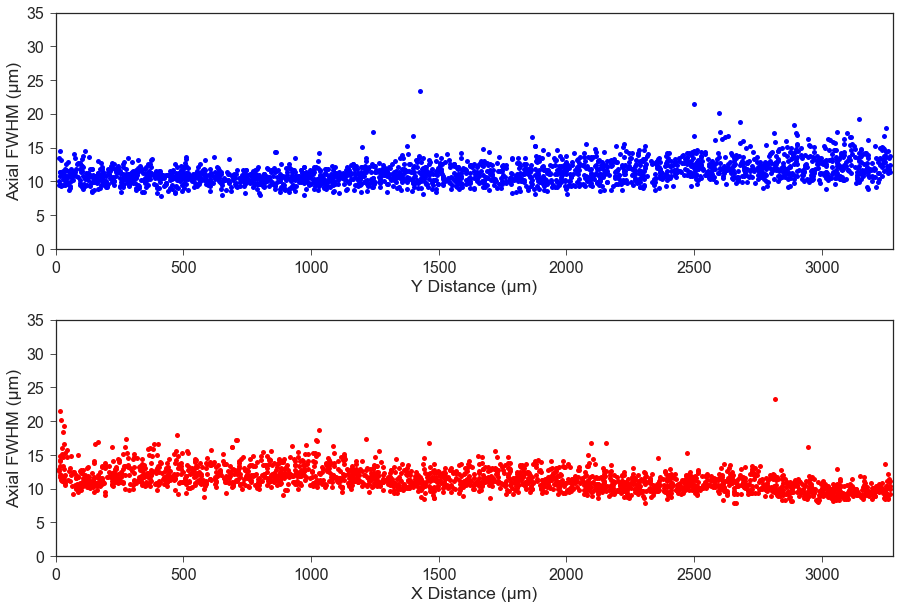

In [178]:
%matplotlib inline
fig = plt.figure(figsize=(15,10));

subfigure0 = fig.add_subplot(211)
subfigure0.plot(np.multiply(PSF['Y'].tolist(),UmPerPxLat),PSF['FWHMax'].tolist(),'.b',ms=10)
subfigure0.set_xlim([0,options['FOVumLat']])
subfigure0.set_ylim([0,35])
subfigure0.set_xlabel('Y Distance (μm)')
subfigure0.set_ylabel('Axial FWHM (μm)')

subfigure1 = fig.add_subplot(212)
subfigure1.plot(np.multiply(PSF['X'].tolist(),UmPerPxLat),PSF['FWHMax'].tolist(),'.r',ms=10)
subfigure1.set_xlim([0,options['FOVumLat']])
subfigure1.set_ylim([0,35])
subfigure1.set_xlabel('X Distance (μm)')
subfigure1.set_ylabel('Axial FWHM (μm)')

plt.subplots_adjust(hspace = 0.3)

### Save data and plots

In [179]:
PSF.to_csv('results/withoutETL-20ms-199hz-4x.csv')

In [180]:
fig.savefig('results/withoutETL-20ms-199Hz-4x-ETL-Comparision.svg', facecolor=fig.get_facecolor(), edgecolor='none',dpi=200)
fig.savefig('results/withoutETL-20ms-199Hz-4x-ETL-Comparision.jpg', facecolor=fig.get_facecolor(), edgecolor='none',dpi=200)

## Sanity checks

### Plot max projection and detected beads

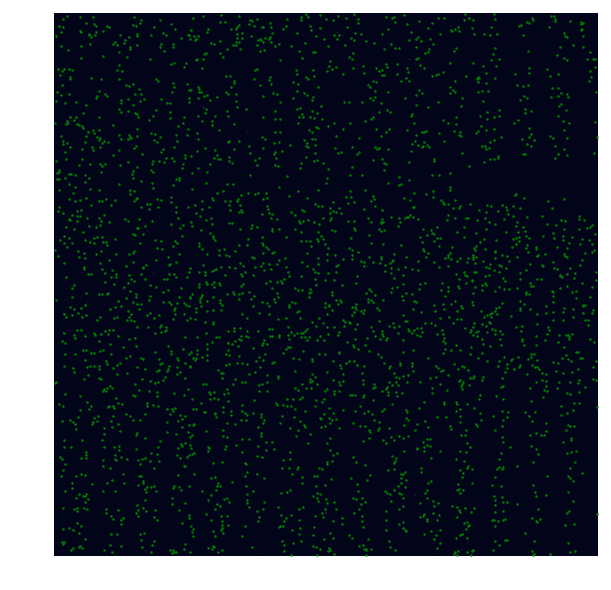

In [14]:
plt.figure(figsize=(10,10));
plt.imshow(smoothed);
plt.plot(PSF['X'].tolist(), PSF['Y'].tolist(), 'g.', ms=5);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off'); 

### Axial and lateral FWHM Histogram

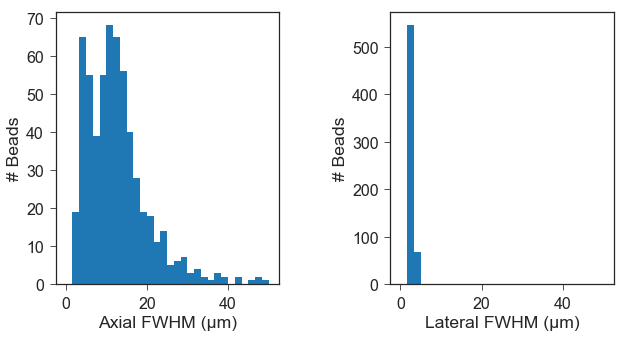

In [168]:
fig = plt.figure(figsize=(10,5))
subfigure0 = fig.add_subplot(121)
subfigure0.hist(PSF['FWHMax'].tolist(),30,range=(0,50))
subfigure0.set_xlabel('Axial FWHM (μm)')
subfigure0.set_ylabel('# Beads')
subfigure1 = fig.add_subplot(122)
subfigure1.hist(PSF['FWHMlat'].tolist(),30,range=(0,50))
subfigure1.set_xlabel('Lateral FWHM (μm)')
subfigure1.set_ylabel('# Beads')

plt.subplots_adjust(wspace = 0.5)

### Lateral vs. axial FWHM correlation

(0, 25)

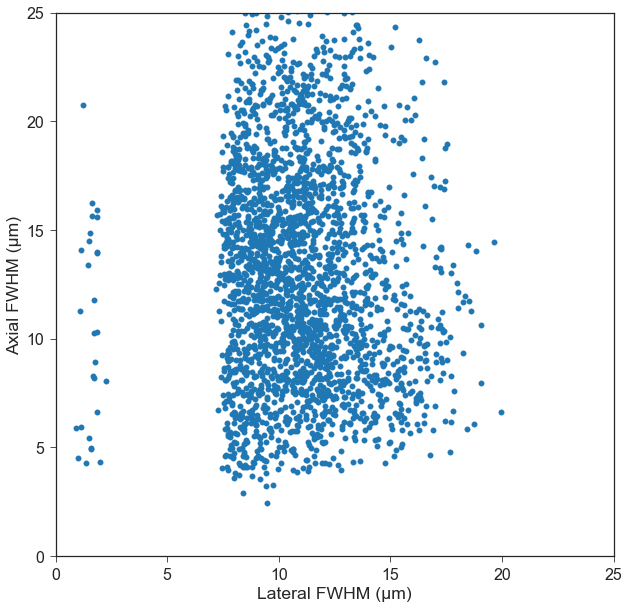

In [61]:
fig = plt.figure(figsize=(10,10))
subfigure0 = fig.add_subplot(111)
subfigure0.scatter(PSF['FWHMlat'].tolist(),PSF['FWHMax'].tolist())
subfigure0.set_xlabel('Lateral FWHM (μm)')
subfigure0.set_ylabel('Axial FWHM (μm)')
subfigure0.set_xlim([0,25])
subfigure0.set_ylim([0,25])

### Overview Plots

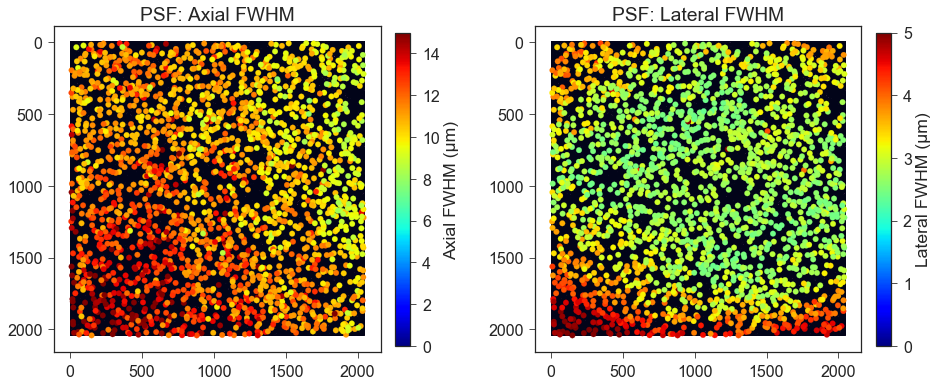

In [181]:
fig = plt.figure(figsize=(15,7.5));

subfigure0 = fig.add_subplot(121)
subfigure0.imshow(smoothed)
overlay0 = subfigure0.scatter(PSF['X'].tolist(), PSF['Y'].tolist(), c=PSF['FWHMax'].tolist(), cmap='jet', vmin=0, vmax=15)
subfigure0.axis('on');
subfigure0.set_title('PSF: Axial FWHM')
cbar0 = plt.colorbar(overlay0,fraction=0.044, pad=0.04)
cbar0.set_label('Axial FWHM (μm)')


subfigure1 = fig.add_subplot(122)
subfigure1.imshow(smoothed);
overlay1 = subfigure1.scatter(PSF['X'].tolist(), PSF['Y'].tolist(), c=PSF['FWHMlat'].tolist(), cmap='jet', vmin=0, vmax=5);
subfigure1.axis('on');
subfigure1.set_title('PSF: Lateral FWHM')
cbar1 = plt.colorbar(overlay1,fraction=0.044, pad=0.04)
cbar1.set_label('Lateral FWHM (μm)')

plt.subplots_adjust(wspace = 0.35)

In [182]:
fig.savefig('results/withoutETL-20ms-199Hz-4x-ETL-Comparision_XYplot-improved-colors.svg', facecolor=fig.get_facecolor(), edgecolor='none',dpi=200)
fig.savefig('results/withoutETL-20ms-199Hz-4x-ETL-Comparision_XYplot-improved-colors.jpg', facecolor=fig.get_facecolor(), edgecolor='none',dpi=200)

###  Subselecting a dataframe

In [100]:
centerPSFs = PSF[PSF.Y < 1224]
centerPSFs = centerPSFs[centerPSFs.Y > 824]
centerPSFs = centerPSFs[centerPSFs.X > 100]

In [101]:
print('# Beads: ', len(centerPSFs))
print('Mean lateral FWHM: ', round(centerPSFs['FWHMlat'].mean(),3), ' +/- ', round(centerPSFs['FWHMlat'].sem(),3), ' μm')
print('Mean axial FWHM: ', round(centerPSFs['FWHMax'].mean(),3), ' +/- ', round(centerPSFs['FWHMax'].sem(),3), ' μm')

# Beads:  633
Mean lateral FWHM:  8.615  +/-  0.098  μm
Mean axial FWHM:  6.604  +/-  0.054  μm


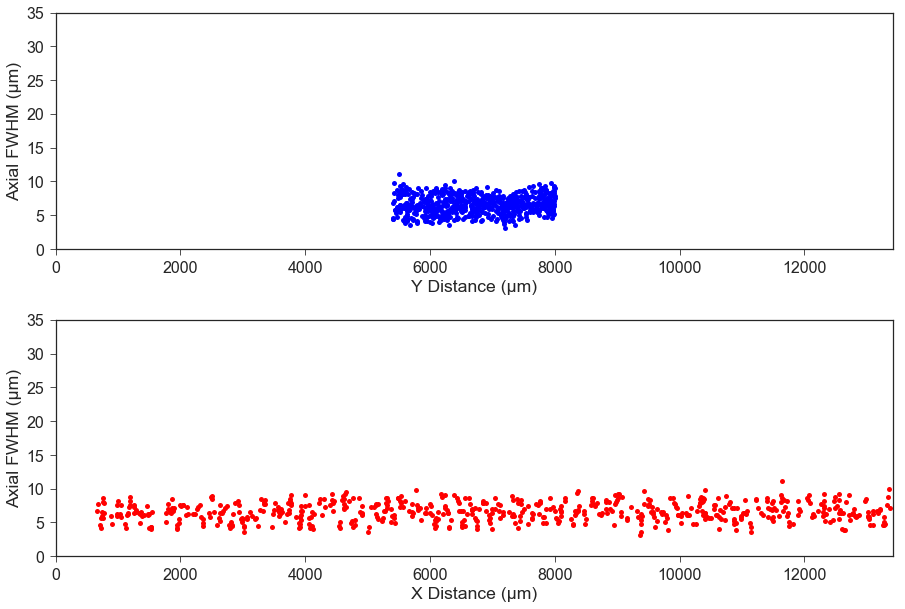

In [102]:
%matplotlib inline
fig = plt.figure(figsize=(15,10));

subfigure0 = fig.add_subplot(211)
subfigure0.plot(np.multiply(centerPSFs['Y'].tolist(),UmPerPxLat),centerPSFs['FWHMax'].tolist(),'.b',ms=10)
subfigure0.set_xlim([0,options['FOVumLat']])
subfigure0.set_ylim([0,35])
subfigure0.set_xlabel('Y Distance (μm)')
subfigure0.set_ylabel('Axial FWHM (μm)')

subfigure1 = fig.add_subplot(212)
subfigure1.plot(np.multiply(centerPSFs['X'].tolist(),UmPerPxLat),centerPSFs['FWHMax'].tolist(),'.r',ms=10)
subfigure1.set_xlim([0,options['FOVumLat']])
subfigure1.set_ylim([0,35])
subfigure1.set_xlabel('X Distance (μm)')
subfigure1.set_ylabel('Axial FWHM (μm)')

plt.subplots_adjust(hspace = 0.3)

In [105]:
PSF.to_csv('results/withETL-5ms-199hz-1x-subregion2.csv')

In [106]:
fig.savefig('results/withETL-5ms-199Hz-1x-ETL-Comparision-subregion2.svg', facecolor=fig.get_facecolor(), edgecolor='none',dpi=200)
fig.savefig('results/withETL-5ms-199Hz-1x-ETL-Comparision-subregion2.jpg', facecolor=fig.get_facecolor(), edgecolor='none',dpi=200)

### Plot XYZ projections and fit

In [171]:
fig = plt.figure()

def update(w = 50):
    beadInd = w
    average = beads[beadInd]
    
    fig, _axs = plt.subplots(nrows=1, ncols=3)
    axs = _axs.flatten()

    XYview = axs[0].imshow(average.mean(axis=0));
    XZview = axs[1].imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
    YZview = axs[2].imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
    plt.show()
    plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])
    plt.show()
    plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])
    plt.show()

interact(update, w=IntSlider(min=0,max=len(PSF)-1,step=1,value=0,continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='w', max=613), Output()), _dom_classes=('widget-interact',))